## 数据分析

### 股票除权除息

In [1]:
import pandas as pd
import numpy as np

In [38]:
fname = 'stock-data/600690.csv'
data = pd.read_csv(fname, index_col='日期', parse_dates=True);

#### 缺失值处理

In [39]:
end = data.index[0]
start = data.index[-1]
idx = pd.date_range(start=start, end=end)
data = data.reindex(idx)

In [40]:
# 不知道为什么，这个调用无效
# to_replace = {
#     '收盘价': {0.0, np.nan}, 
#     '最高价': {0.0, np.nan}, 
#     '最低价': {0.0, np.nan}, 
#     '开盘价': {0.0, np.nan},
#     '涨跌幅': {'None', 0}
# }
# data.replace(to_replace=to_replace, inplace=True)

In [41]:
data['2016-01-27':'2016-02-03']

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌幅,换手率,成交量,成交金额
2016-01-27,'600690,青岛海尔,0.00,0.00,0.00,0.00,9.92,None,0.0000,0.0,0.0
2016-01-28,'600690,青岛海尔,0.00,0.00,0.00,0.00,9.92,None,0.0000,0.0,0.0
2016-01-29,'600690,青岛海尔,0.00,0.00,0.00,0.00,9.92,None,0.0000,0.0,0.0
2016-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,'600690,青岛海尔,8.93,9.38,8.93,8.93,9.92,-9.9798,0.7363,40567470.0,362911767.0
2016-02-02,'600690,青岛海尔,8.51,8.80,8.18,8.18,8.93,-4.7032,1.8993,104639931.0,888538495.0
2016-02-03,'600690,青岛海尔,8.27,8.45,8.15,8.28,8.51,-2.8202,1.0539,58066731.0,480591784.0


In [42]:
data['收盘价'] = data['收盘价'].replace(0.00, np.nan)
data['最高价'] = data['最高价'].replace(0.00, np.nan)
data['最低价'] = data['最低价'].replace(0.00, np.nan)
data['开盘价'] = data['开盘价'].replace(0.00, np.nan)
data['涨跌幅'] = data['涨跌幅'].replace('None', 0)

In [43]:
data['2016-01-27':'2016-02-03']

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌幅,换手率,成交量,成交金额
2016-01-27,'600690,青岛海尔,NaN,NaN,NaN,NaN,9.92,0,0.0000,0.0,0.0
2016-01-28,'600690,青岛海尔,NaN,NaN,NaN,NaN,9.92,0,0.0000,0.0,0.0
2016-01-29,'600690,青岛海尔,NaN,NaN,NaN,NaN,9.92,0,0.0000,0.0,0.0
2016-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,'600690,青岛海尔,8.93,9.38,8.93,8.93,9.92,-9.9798,0.7363,40567470.0,362911767.0
2016-02-02,'600690,青岛海尔,8.51,8.80,8.18,8.18,8.93,-4.7032,1.8993,104639931.0,888538495.0
2016-02-03,'600690,青岛海尔,8.27,8.45,8.15,8.28,8.51,-2.8202,1.0539,58066731.0,480591784.0


In [44]:
data['换手率'] = data['换手率'].fillna(0)
data['成交量'] = data['成交量'].fillna(0)
data['成交金额'] = data['成交金额'].fillna(0)
data['前收盘'] = data['前收盘'].fillna(method='bfill')
data.fillna(method='ffill', inplace=True)

In [45]:
data['2016-01-27':'2016-02-03']

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌幅,换手率,成交量,成交金额
2016-01-27,'600690,青岛海尔,9.92,10.10,9.75,9.85,9.92,0,0.0000,0.0,0.0
2016-01-28,'600690,青岛海尔,9.92,10.10,9.75,9.85,9.92,0,0.0000,0.0,0.0
2016-01-29,'600690,青岛海尔,9.92,10.10,9.75,9.85,9.92,0,0.0000,0.0,0.0
2016-01-30,'600690,青岛海尔,9.92,10.10,9.75,9.85,9.92,0,0.0000,0.0,0.0
2016-01-31,'600690,青岛海尔,9.92,10.10,9.75,9.85,9.92,0,0.0000,0.0,0.0
2016-02-01,'600690,青岛海尔,8.93,9.38,8.93,8.93,9.92,-9.9798,0.7363,40567470.0,362911767.0
2016-02-02,'600690,青岛海尔,8.51,8.80,8.18,8.18,8.93,-4.7032,1.8993,104639931.0,888538495.0
2016-02-03,'600690,青岛海尔,8.27,8.45,8.15,8.28,8.51,-2.8202,1.0539,58066731.0,480591784.0


#### 按百分比除权

In [46]:
data.head(12)

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌幅,换手率,成交量,成交金额
1993-11-19,'600690,青岛海尔,12.79,12.90,11.91,12.00,7.38,73.3062,52.8144,26407200.0,329492000.0
1993-11-20,'600690,青岛海尔,12.79,12.90,11.91,12.00,12.79,73.3062,0.0000,0.0,0.0
1993-11-21,'600690,青岛海尔,12.79,12.90,11.91,12.00,12.79,73.3062,0.0000,0.0,0.0
1993-11-22,'600690,青岛海尔,13.00,13.35,12.68,12.97,12.79,1.6419,18.7752,9387600.0,121955000.0
1993-11-23,'600690,青岛海尔,12.80,13.18,12.50,13.10,13.00,-1.5385,10.2208,5110400.0,66084000.0
1993-11-24,'600690,青岛海尔,13.01,13.70,12.50,12.80,12.80,1.6406,15.2672,7633600.0,99950000.0
1993-11-25,'600690,青岛海尔,13.78,14.40,13.28,13.30,13.01,5.9185,19.4256,9712800.0,134096000.0
1993-11-26,'600690,青岛海尔,13.35,14.25,13.10,14.20,13.78,-3.1205,8.8698,4434900.0,60802000.0
1993-11-27,'600690,青岛海尔,13.35,14.25,13.10,14.20,13.35,-3.1205,0.0000,0.0,0.0
1993-11-28,'600690,青岛海尔,13.35,14.25,13.10,14.20,13.35,-3.1205,0.0000,0.0,0.0


### 股票振幅

In [1]:
import stock_analysis as sa

amp = sa.amplitude(datadir='stock-data', interval=30, end_date="2015-12-22")

head 5 recent amplitude in period of 30 for all stocks in stock-data till 2015-12-22 00:00:00:
       id  amp
0  600690  NaN
tail 5 recent ripples in period of 30 for all stocks in stock-data till 2015-12-22 00:00:00:
       id  amp
0  600690  NaN


/Users/kamidox/work/stock-analysis/stock_analysis.py:30: RuntimeWarning: invalid value encountered in double_scalars
  return d['最高价'].max() / d['最低价'].min()


In [12]:
amp[amp['amp'] < 1.3]

,id,amp
568,002574,1.299804
347,002351,1.299571
478,002482,1.299156
180,002181,1.298887
668,002674,1.298436
360,002364,1.298000
575,002581,1.295427
628,002634,1.295279
397,002401,1.295178
268,002270,1.293103


### 增长曲线

In [10]:
import yahoo_stock as ys

In [86]:
# 600690.ss 000951.sz 002001.sz
stockid = '600690.sz'
stockfile = '600690.csv'

In [72]:
ys.retrive_stock_data(stockid, 'yahoo-data')

downloading 002001.sz to yahoo-data from http://table.finance.yahoo.com/table.csv?s=002001.sz


In [87]:
ds = pd.read_csv(os.path.join('yahoo-data', stockfile), index_col='Date', parse_dates=True)
ds.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-05-19,8.84,9.05,8.81,8.84,34785900,8.84
2016-05-18,8.82,8.93,8.65,8.88,44254300,8.88
2016-05-17,9.08,9.08,8.82,8.83,42392200,8.83
2016-05-16,8.90,9.08,8.80,9.07,59749500,9.07
2016-05-13,9.00,9.08,8.86,8.98,67999000,8.98


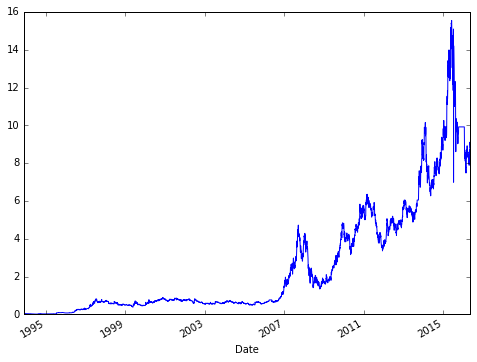

In [88]:
ds['Adj Close'].plot(figsize=(8, 6))

### 增长倍数

#### 最大增长倍数及最大年化复合增长率

计算最低价和最高价之间的收盘价比较，以及增长的倍数和年化复全增长率，这个反应的是一个股票最好的情况下的投资收益情况。

In [89]:
price = ds['Adj Close']
# 最高增长倍数
total_max_growth = ds['Adj Close'].max() / ds['Adj Close'].min()
total_max_growth

1113.2977809591985

In [90]:
# 最大年均复合增长率
min_date = price.argmin()
max_date = price.argmax()
max_growth_per_year = total_max_growth ** (1.0 / (max_date.year - min_date.year))
max_growth_per_year

1.3966150915746656

#### 当前增长倍数及复合增长率

计算上市时的收盘价与当前的收盘价比较，增长的倍数和年化复全增长率。

In [91]:
# 当前平均增长倍数
total_growth = price.ix[0] / price.ix[-1]
total_growth

174.29022082018926

In [92]:
# 年复合增长倍数
old_date = price.index[-1]
now_date = price.index[0]
growth_per_year = total_growth ** (1.0 / (now_date.year - old_date.year))
growth_per_year

1.2515455288767383

#### 平均年化增长率

计算每年的增长率，然后再求平均值。也可以计算每月的增长率，再求平均值，可以看到更短的一些周期变化。

In [93]:
price_in_years = price.to_period(freq='A').groupby(level=0).first()
price_in_years

Date
1993    0.03573
1994    0.02459
1995    0.07254
1996    0.27879
1997    0.69135
1998    0.50219
1999    0.48011
2000    0.80252
2001    0.78662
2002    0.53786
2003    0.60910
2004    0.56913
2005    0.60712
2006    1.50079
2007    3.80700
2008    1.67358
2009    4.82062
2010    5.76779
2011    3.70347
2012    5.72073
2013    8.85739
2014    8.96458
2015    9.92000
2016    8.84000
Freq: A-DEC, Name: Adj Close, dtype: float64

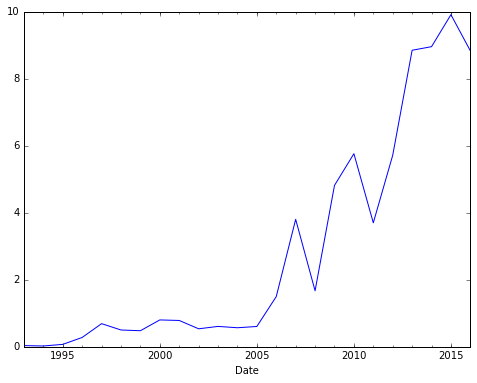

In [94]:
price_in_years.plot(figsize=(8,6))

In [95]:
# 这里的关键信息：
# 计算年化收益率时，diff 应该要除以前一年的价格，即在前一年的价格的基础上上涨了多少，而不是在当前年的价格。
diff = price_in_years.diff()
rate_in_years =  diff / (price_in_years - diff)
rate_in_years

Date
1993         NaN
1994   -0.311783
1995    1.949980
1996    2.843259
1997    1.479824
1998   -0.273610
1999   -0.043967
2000    0.671534
2001   -0.019813
2002   -0.316239
2003    0.132451
2004   -0.065621
2005    0.066751
2006    1.471982
2007    1.536664
2008   -0.560394
2009    1.880424
2010    0.196483
2011   -0.357905
2012    0.544695
2013    0.548297
2014    0.012102
2015    0.106577
2016   -0.108871
Freq: A-DEC, Name: Adj Close, dtype: float64

In [96]:
rate_in_years.mean()

0.49490517308582499

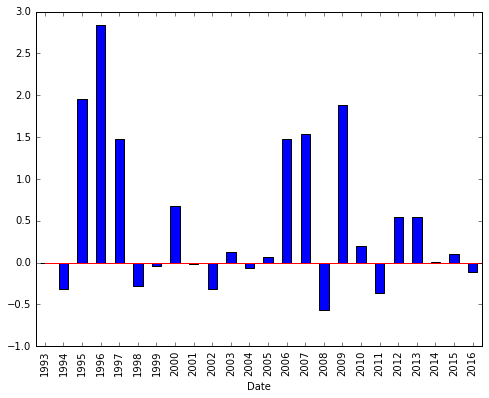

In [97]:
rate_in_years.plot(kind='bar', figsize=(8,6))
X = [0, len(rate_in_years)]
Y = [0, 0]
plt.plot(X, Y, color='red', linestyle='-')